In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import os
import gc

b_history_header = ["user_id","bh_time","browse_behavior","browse_num"]
l_time_header = ["user_id","grant_time"]
overdue_header = ["user_id","is_overdue"]

basis_path_temp = "C:\\Users\\CDA\\graduated_design\\data\\temp_data\\"
basis_path = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
basis_path_test = "C:\\Users\\CDA\\graduated_design\\data\\test_data\\"

l_time_path = os.path.join(basis_path,"loan_time_train.txt")
#l_time_path_test = os.path.join(basis_path_test,"loan_time_test.txt")

b_history_path = os.path.join(basis_path,"browse_history_train.txt")
#b_history_path_test = os.path.join(basis_path_test,"browse_history_test.txt")

overdue_path = os.path.join(basis_path,"overdue_train.txt")

In [2]:
browse_history_train = pd.read_table(b_history_path,sep = ",",header = None,names = b_history_header)
loan_time_train = pd.read_table(l_time_path,sep = ",",header = None,names = l_time_header)
#overdue_train = pd.read_table(overdue_path,sep = ",",header = None,names = overdue_header)

In [155]:
browse_history_train["browse_num"] = browse_history_train["browse_num"].astype("category")
browse_history_train["browse_behavior"] = browse_history_train["browse_behavior"].astype("category")

In [62]:
browse_history_train_loan = pd.merge(browse_history_train,loan_time_train,how = "left",on = "user_id")

In [64]:
bh_loan_aft = browse_history_train_loan[browse_history_train_loan["bh_time"]>browse_history_train_loan["grant_time"]]
bh_loan_bef = browse_history_train_loan[browse_history_train_loan["bh_time"]<browse_history_train_loan["grant_time"]]

In [63]:
print(len(browse_history_train_loan[browse_history_train_loan["bh_time"]>browse_history_train_loan["grant_time"]]))
print(len(browse_history_train_loan[browse_history_train_loan["bh_time"]<browse_history_train_loan["grant_time"]]))

1800104
21119443


In [60]:
x = bh_loan_bef.groupby("user_id").count()
a = x.reset_index()

In [1]:
len(b)

NameError: name 'b' is not defined

In [65]:
b = a.loc[:,["user_id","bh_time"]]
b.rename(columns = {"bh_time":"total_counts"},inplace = True)
b

user_id  total_counts
0            2          1305
1            3           342
2            4           364
3            6            15
4            7          1008
5            8          1111
6           10           320
7           12           516
8           14           208
9           15           154
10          16           153
11          17          2478
12          18           100
13          19          2025
14          20           594
15          21           348
16          22           160
17          23           348
18          24           189
19          25           308
20          28          1440
21          29           275
22          30           378
23          31           606
24          32            96
25          33           182
26          34           350
27          35           154
28          36          1140
29          37           312
...        ...           ...
47300    55564          1210
47301    55565           301
47302    55566           180
47303    55567           602
47304    55569           871
47305    55570           154
47306    55571           402
47307    55572           414
47308    55573           230
47309    55574           270
47310    55576           630
47311    55577           448
47312    55578            80
47313    55579           759
47314    55580           531
47315    55581           990
47316    55582           432
47317    55583           152
47318    55584           728
47319    55585           141
47320    55586           770
47321    55587           136
47322    55588           568
47323    55589           364
47324    55590           168
47325    55592           396
47326    55593           179
47327    55594           960
47328    55595           630
47329    55596           120

[47330 rows x 2 columns]

In [66]:
read = pd.read_csv("C:\\Users\\CDA\\graduated_design\\data\\simp_train_data\\browse_temp_table\\gb_bro_bef_44944.csv")
read.iloc[:3,:]

user_id  bh_bef_6  bh_bef_7  bh_bef_9  bh_bef_10  bh_bef_11  bh_bef_12  \
0        2       0.0       2.0       0.0        0.0        0.0        0.0   
1        3       0.0       0.0       0.0        0.0        0.0        0.0   
2        4       0.0       0.0       0.0        0.0        0.0        0.0   

   bh_bef_13  bh_bef_15  bh_bef_20       ...        b_num_bef_1  b_num_bef_3  \
0        0.0        0.0        0.0       ...               36.0          6.0   
1        0.0        0.0        0.0       ...               27.0          0.0   
2        0.0        0.0        0.0       ...               21.0          1.0   

   b_num_bef_4  b_num_bef_5  b_num_bef_6  b_num_bef_7  b_num_bef_8  \
0         10.0          7.0          9.0          7.0          7.0   
1          8.0          5.0          4.0          7.0          0.0   
2          8.0          5.0          4.0          5.0          1.0   

   b_num_bef_9  b_num_bef_10  bro_bef_counts  
0          0.0           5.0            87.0  
1          0.0           4.0            55.0  
2          0.0           2.0            47.0  

[3 rows x 114 columns]

In [3]:
browse_unique_train = browse_history_train.drop_duplicates()
len(browse_unique_train)#尝试 all/unique  重复次数

2576726

In [69]:
len(browse_unique_train)

2576726

In [4]:
gb_browse_his_unique = browse_unique_train.groupby("browse_behavior")["user_id"].count().reset_index()
df_gb_browse_his_unique = DataFrame(gb_browse_his_unique)
df_gb_browse_his_unique.rename(columns = {"user_id":"browse_unique_record_counts"},inplace = True)
#print(len(df_gb_browse_his[df_gb_browse_his["browse_record_counts"]<20000]))
#df_gb_browse_his_10000 = df_gb_browse_his[df_gb_browse_his["user_record_counts"]<20000]
browse_unique_merge = pd.merge(browse_unique_train,df_gb_browse_his_unique,how = "left",on = "browse_behavior")
#merge_table = pd.merge(merge_table,overdue_train,how = "left",on = "user_id")
browse_unique_merge

user_id     bh_time  browse_behavior  browse_num  \
0    34801  5926003545              173           1   
1    34801  5926003545              164           4   
2    34801  5926003545               38           7   

   browse_unique_record_counts  
0                       174746  
1                       157233  
2                       161159

In [72]:
len(browse_unique_merge)

2576726

In [8]:
print(len(browse_unique_merge[browse_unique_merge["browse_unique_record_counts"]<250]["browse_behavior"].unique()))
browse_unique_merge[browse_unique_merge["browse_unique_record_counts"]<250]["browse_behavior"].unique()

111


array([172, 175, 116, 136, 185, 192, 184,  94, 129, 214,   8, 204,  61,
       134, 137,  29,   4, 203,  85,  74,  78, 126,  84, 140,  32,  40,
       198,  49, 159, 165, 170, 176,  92,  26, 196, 199,   3,  14,  22,
        73, 122,  48, 177, 181, 215, 112, 160, 158, 131, 169, 205, 174,
       128,  87,  83,  21, 113,  16, 114, 102, 111, 121,  19, 216, 132,
       135, 125,  30,  27,   2, 145,  54,  67,  24, 168, 154, 206, 211,
       156,  99,  98,  18,  58, 171, 186, 117,  95,  68,  47,  79, 127,
       100, 115, 179, 182, 183,  65,  69, 212,  72,  63, 187,  17,  93,
       142,   5,  81,   1,  70, 124,  52], dtype=int64)

In [6]:
rem_lst = np.array([172, 175, 116, 136,  43, 185,  37, 123, 192, 184,  94, 129, 214,
        66,   8,   9, 138, 204,  61, 134, 137,  29,   4, 203,  85,  74,
        78, 126,  84, 140,  32,  40, 198,  49, 159, 165, 170, 176,  92,
        26, 196, 199,   3,  14,  22,  73, 122,  48, 177, 181, 215, 112,
       160, 158, 131, 169, 205, 174, 128,  87,  83,  21, 113,  16, 114,
       102, 111, 121,  19, 216, 132, 135, 125,  30,  27,   2, 145,  54,
        67,  24, 168, 154, 206, 211, 156,  99,  98,  18,  58, 171, 186,
       117,  95,  68,  47,  79, 127, 100, 115, 179, 182, 183,  65,  69,
       212,  72,  63, 187,  17,  93, 142,   5,  81,   1,  70, 124,  52])
rem_lst

array([172, 175, 116, 136,  43, 185,  37, 123, 192, 184,  94, 129, 214,
        66,   8,   9, 138, 204,  61, 134, 137,  29,   4, 203,  85,  74,
        78, 126,  84, 140,  32,  40, 198,  49, 159, 165, 170, 176,  92,
        26, 196, 199,   3,  14,  22,  73, 122,  48, 177, 181, 215, 112,
       160, 158, 131, 169, 205, 174, 128,  87,  83,  21, 113,  16, 114,
       102, 111, 121,  19, 216, 132, 135, 125,  30,  27,   2, 145,  54,
        67,  24, 168, 154, 206, 211, 156,  99,  98,  18,  58, 171, 186,
       117,  95,  68,  47,  79, 127, 100, 115, 179, 182, 183,  65,  69,
       212,  72,  63, 187,  17,  93, 142,   5,  81,   1,  70, 124,  52])

In [7]:
rem_ser = Series(rem_lst,name = "browse_behavior")
rem_df = DataFrame(rem_ser)

In [7]:
browse_unique_rem = pd.merge(browse_unique_merge,rem_df,how = "inner",on = "browse_behavior")
browse_unique_rem["user_id"].unique()

array([45758, 34376, 11252, ..., 45464,  6364, 15069], dtype=int64)

In [8]:
rem_user_df = DataFrame(Series(browse_unique_rem["user_id"].unique(),name = "user_id"))

In [13]:
rem_is_overdue = pd.merge(overdue_train,rem_user_df,how = "inner",on = "user_id")
rem_is_overdue["is_overdue"].value_counts()

0    1884
1     297
Name: is_overdue, dtype: int64

In [33]:
overdue_train["is_overdue"].value_counts()

0    48413
1     7183
Name: is_overdue, dtype: int64

In [34]:
7183/48413

0.14836923966703158

In [35]:
297/1884#比例相近 ，决定删除。

0.15764331210191082

In [73]:
browse_unique_merge.iloc[:3,:]

user_id     bh_time  browse_behavior  browse_num  \
0    34801  5926003545              173           1   
1    34801  5926003545              164           4   
2    34801  5926003545               38           7   

   browse_unique_record_counts  
0                       174746  
1                       157233  
2                       161159

In [5]:
browse_unique_250ab = browse_unique_merge[browse_unique_merge["browse_unique_record_counts"]>=250]

In [6]:
browse_unique_250ab.drop("browse_unique_record_counts",axis = 1,inplace = True)
browse_unique_250ab

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


user_id     bh_time  browse_behavior  browse_num
0          34801  5926003545              173           1
1          34801  5926003545              164           4
2          34801  5926003545               38           7
3          34801  5926003545               45           1
4          34801  5926003545              110           7
5          34801  5926003545              118           1
6          34801  5926003545               50           6
7          34801  5926003545              139           4
8          34801  5926003545               82           1
9          34801  5926003545              101           1
10         34801  5902423089              173           1
11         34801  5902423089               82           1
12         34801  5902423089               53           1
13         34801  5902423089              139           4
14         34801  5902423089              190          10
15         34801  5902423089               50           6
16         34801  5902423089              118           1
17         34801  5902423089               80           1
18         34801  5902423089               45           1
19         34801  5902423089              120           1
20         34801  5902423089               38           7
21         34801  5902423089              164           4
22         34801  5922694022              139           4
23         34801  5922694022               45           1
24         34801  5922694022              110           7
25         34801  5922694022              118           1
26         34801  5922694022              173           1
27         34801  5922694022               82           1
28         34801  5922694022               50           6
29         34801  5922694022              189           1
...          ...         ...              ...         ...
2576696    24165  5915342049              118           1
2576697    24165  5915601184              118           1
2576698    24165  5915342049              101           1
2576699    23832  5906874539              188           5
2576700    23832  5906874539               38           7
2576701    23832  5906874539               80           1
2576702    23832  5906874539               50           6
2576703    23832  5906874539              139           4
2576704    23832  5906874539               23          10
2576705    23832  5906874539              104          10
2576706    23832  5906874539               45           1
2576707    23832  5906874539              118           1
2576708    23832  5906874539              173           1
2576709    23832  5906874539               53           1
2576710    23832  5906874539               31           8
2576711    23832  5906874539              164           4
2576712    23832  5906874539               41           1
2576713    43509  5921822693              189           1
2576714    43509  5921822693              190          10
2576715    43509  5921822693               44           5
2576716    43509  5921822693              139           4
2576717    43509  5921822693              173           1
2576718    43509  5921822693               82           1
2576719    43509  5921822693              167           8
2576720    43509  5921822693              164           4
2576721    43509  5921822693              120           1
2576722    43509  5921822693              110           7
2576723    43509  5921822693              101           1
2576724    43509  5921822693              118           1
2576725    43509  5921822693               38           7

[2572356 rows x 4 columns]

In [30]:
np.savetxt(os.path.join(basis_path,"browse_temp_table\\bro_250ab_result.txt"),browse_unique_250ab.values,delimiter = "\t",header = '')


In [74]:
browse_unique_train_dummies = pd.get_dummies(browse_unique_train,columns = ["browse_behavior","browse_num"])

MemoryError: 

In [6]:

b_history_header = ["user_id","bh_time","browse_behavior","browse_num"]

read_bro_aft_result = pd.read_table(os.path.join(basis_path,"browse_temp_table\\bro_250ab_result.txt"),sep = "\t",header = None,names = b_history_header,index_col = False)
read_bro_aft_result.iloc[:3,:]

user_id       bh_time  browse_behavior  browse_num
0  34801.0  5.926004e+09            173.0         1.0
1  34801.0  5.926004e+09            164.0         4.0
2  34801.0  5.926004e+09             38.0         7.0

In [15]:
browse_unique_250ab_dummies = pd.get_dummies(browse_unique_250ab,columns = ["browse_behavior","browse_num"])


In [25]:
browse_unique_250ab_dummies["bh_time"]

0          5926003545
1          5926003545
2          5926003545
3          5926003545
4          5926003545
5          5926003545
6          5926003545
7          5926003545
8          5926003545
9          5926003545
10         5902423089
11         5902423089
12         5902423089
13         5902423089
14         5902423089
15         5902423089
16         5902423089
17         5902423089
18         5902423089
19         5902423089
20         5902423089
21         5902423089
22         5922694022
23         5922694022
24         5922694022
25         5922694022
26         5922694022
27         5922694022
28         5922694022
29         5922694022
              ...    
2576696    5915342049
2576697    5915601184
2576698    5915342049
2576699    5906874539
2576700    5906874539
2576701    5906874539
2576702    5906874539
2576703    5906874539
2576704    5906874539
2576705    5906874539
2576706    5906874539
2576707    5906874539
2576708    5906874539
2576709    5906874539
2576710   

In [7]:
browse_unique_250ab_loan = pd.merge(browse_unique_250ab,loan_time_train,how = "inner",on = "user_id")

In [8]:
len(browse_unique_250ab_loan)

2572356

In [40]:
browse_unique_250ab_loan = pd.merge(browse_unique_250ab_dummies,loan_time_train,how = "inner",on = "user_id")

In [43]:
print(len(browse_unique_250ab_loan))

2572356


In [4]:
print(len(read_bro_aft_result))

2572356


In [5]:
print(len(read_bro_aft_result[read_bro_aft_result["bh_time"]>read_bro_aft_result["grant_time"]]))
print(len(read_bro_aft_result[read_bro_aft_result["bh_time"]<read_bro_aft_result["grant_time"]]))

239100
2333256


In [28]:
print(len(browse_unique_250ab_loan[browse_unique_250ab_loan["bh_time"]>browse_unique_250ab_loan["grant_time"]]))
print(len(browse_unique_250ab_loan[browse_unique_250ab_loan["bh_time"]<browse_unique_250ab_loan["grant_time"]]))
print(len(browse_unique_250ab_loan[browse_unique_250ab_loan["bh_time"]==browse_unique_250ab_loan["grant_time"]]))

239100
2333256


In [50]:
np.savetxt(os.path.join(basis_path,"browse_temp_table\\bro_250ab_4result.txt"),browse_unique_250ab_loan.values,delimiter = ",",header = '')
#?np.savetxt

In [3]:
read_bro_aft_result = pd.read_table(os.path.join(basis_path,"browse_temp_table\\bro_250ab_4result.txt"),sep = ",",header = None,names = bro_250ab_4result_name,index_col = False)
read_bro_aft_result.iloc[:3,:]

user_id       bh_time  browse_behavior_6  browse_behavior_7  \
0  34801.0  5.926004e+09                0.0                0.0   
1  34801.0  5.926004e+09                0.0                0.0   
2  34801.0  5.926004e+09                0.0                0.0   

   browse_behavior_9  browse_behavior_10  browse_behavior_11  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   

   browse_behavior_12  browse_behavior_13  browse_behavior_15      ...       \
0                 0.0                 0.0                 0.0      ...        
1                 0.0                 0.0                 0.0      ...        
2                 0.0                 0.0                 0.0      ...        

   browse_num_1  browse_num_3  browse_num_4  browse_num_5  browse_num_6  \
0           1.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           1.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   

   browse_num_7  browse_num_8  browse_num_9  browse_num_10    grant_time  
0           0.0           0.0           0.0            0.0  5.929544e+09  
1           0.0           0.0           0.0            0.0  5.929544e+09  
2           1.0           0.0           0.0            0.0  5.929544e+09  

[3 rows x 115 columns]

In [2]:
bro_250ab_4result_name = ['user_id', 'bh_time', 'browse_behavior_6', 'browse_behavior_7',
       'browse_behavior_9', 'browse_behavior_10', 'browse_behavior_11',
       'browse_behavior_12', 'browse_behavior_13', 'browse_behavior_15',
       'browse_behavior_20', 'browse_behavior_23', 'browse_behavior_25',
       'browse_behavior_28', 'browse_behavior_31', 'browse_behavior_33',
       'browse_behavior_34', 'browse_behavior_35', 'browse_behavior_36',
       'browse_behavior_37', 'browse_behavior_38', 'browse_behavior_39',
       'browse_behavior_41', 'browse_behavior_42', 'browse_behavior_43',
       'browse_behavior_44', 'browse_behavior_45', 'browse_behavior_46',
       'browse_behavior_50', 'browse_behavior_51', 'browse_behavior_53',
       'browse_behavior_55', 'browse_behavior_56', 'browse_behavior_57',
       'browse_behavior_59', 'browse_behavior_60', 'browse_behavior_62',
       'browse_behavior_64', 'browse_behavior_66', 'browse_behavior_75',
       'browse_behavior_76', 'browse_behavior_77', 'browse_behavior_80',
       'browse_behavior_82', 'browse_behavior_86', 'browse_behavior_88',
       'browse_behavior_89', 'browse_behavior_90', 'browse_behavior_91',
       'browse_behavior_96', 'browse_behavior_97', 'browse_behavior_101',
       'browse_behavior_103', 'browse_behavior_104', 'browse_behavior_105',
       'browse_behavior_106', 'browse_behavior_107', 'browse_behavior_108',
       'browse_behavior_109', 'browse_behavior_110', 'browse_behavior_118',
       'browse_behavior_119', 'browse_behavior_120', 'browse_behavior_123',
       'browse_behavior_130', 'browse_behavior_133', 'browse_behavior_138',
       'browse_behavior_139', 'browse_behavior_143', 'browse_behavior_144',
       'browse_behavior_146', 'browse_behavior_147', 'browse_behavior_148',
       'browse_behavior_149', 'browse_behavior_150', 'browse_behavior_151',
       'browse_behavior_152', 'browse_behavior_153', 'browse_behavior_155',
       'browse_behavior_157', 'browse_behavior_161', 'browse_behavior_162',
       'browse_behavior_163', 'browse_behavior_164', 'browse_behavior_166',
       'browse_behavior_167', 'browse_behavior_173', 'browse_behavior_178',
       'browse_behavior_180', 'browse_behavior_188', 'browse_behavior_189',
       'browse_behavior_190', 'browse_behavior_191', 'browse_behavior_193',
       'browse_behavior_194', 'browse_behavior_195', 'browse_behavior_197',
       'browse_behavior_200', 'browse_behavior_201', 'browse_behavior_202',
       'browse_behavior_207', 'browse_behavior_208', 'browse_behavior_209',
       'browse_behavior_210', 'browse_behavior_213', 'browse_num_1',
       'browse_num_3', 'browse_num_4', 'browse_num_5', 'browse_num_6',
       'browse_num_7', 'browse_num_8', 'browse_num_9', 'browse_num_10',
       'grant_time']
print(len(bro_250ab_4result_name))

115


In [9]:
browse_unique_aft = browse_unique_250ab_loan[browse_unique_250ab_loan["bh_time"]>browse_unique_250ab_loan["grant_time"]]
browse_unique_bef = browse_unique_250ab_loan[browse_unique_250ab_loan["bh_time"]<browse_unique_250ab_loan["grant_time"]]

In [70]:
len(browse_unique_bef)

2333256

In [11]:
print(len(browse_unique_aft))
print(len(browse_unique_bef))

239100
2333256


In [13]:
browse_unique_bef.drop(["bh_time","grant_time"],axis = 1,inplace = True)
browse_unique_aft.drop(["bh_time","grant_time"],axis = 1,inplace = True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
browse_unique_aft_dum = pd.get_dummies(browse_unique_aft,columns=["browse_behavior","browse_num"],prefix = ["bh_aft","b_num_aft"])

In [19]:
browse_unique_aft_dum.iloc[:3,:]

user_id  bh_6  bh_7  bh_10  bh_11  bh_12  bh_13  bh_15  bh_20  bh_23  \
945    52739   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
946    52739   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
947    52739   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...     bh_213  b_num_1  b_num_3  b_num_4  b_num_5  b_num_6  b_num_7  \
945    ...        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
946    ...        0.0      0.0      0.0      0.0      0.0      1.0      0.0   
947    ...        0.0      1.0      0.0      0.0      0.0      0.0      0.0   

     b_num_8  b_num_9  b_num_10  
945      0.0      0.0       1.0  
946      0.0      0.0       0.0  
947      0.0      0.0       0.0  

[3 rows x 107 columns]

In [18]:
browse_unique_bef_dum.iloc[:3,:]

user_id  bh_bef_6  bh_bef_7  bh_bef_9  bh_bef_10  bh_bef_11  bh_bef_12  \
0    34801       0.0       0.0       0.0        0.0        0.0        0.0   
1    34801       0.0       0.0       0.0        0.0        0.0        0.0   
2    34801       0.0       0.0       0.0        0.0        0.0        0.0   

   bh_bef_13  bh_bef_15  bh_bef_20      ...       bh_bef_213  b_num_bef_1  \
0        0.0        0.0        0.0      ...              0.0          1.0   
1        0.0        0.0        0.0      ...              0.0          0.0   
2        0.0        0.0        0.0      ...              0.0          0.0   

   b_num_bef_3  b_num_bef_4  b_num_bef_5  b_num_bef_6  b_num_bef_7  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          1.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          1.0   

   b_num_bef_8  b_num_bef_9  b_num_bef_10  
0          0.0          0.0           0.0  
1          0.0          0.0           0.0  
2          0.0          0.0           0.0  

[3 rows x 113 columns]

In [23]:
browse_unique_aft_dum.apply(lambda x: x.astype("int"))
gb_bro_aft = browse_unique_aft_dum.groupby("user_id").sum()
gb_bro_aft.reset_index(inplace = True)
gb_bro_aft.iloc[:3,:]

user_id  bh_6  bh_7  bh_10  bh_11  bh_12  bh_13  bh_15  bh_20  bh_23  \
0       54   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       72   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       75   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...     bh_213  b_num_1  b_num_3  b_num_4  b_num_5  b_num_6  b_num_7  \
0    ...        0.0      7.0      0.0      4.0      2.0      1.0      1.0   
1    ...        0.0      2.0      0.0      0.0      0.0      0.0      0.0   
2    ...        0.0      2.0      0.0      0.0      0.0      0.0      1.0   

   b_num_8  b_num_9  b_num_10  
0      1.0      0.0       1.0  
1      0.0      0.0       0.0  
2      0.0      0.0       0.0  

[3 rows x 107 columns]

In [71]:
len(gb_bro_bef)

44944

In [24]:
gb_bro_bef = browse_unique_bef_dum.groupby("user_id").sum()
gb_bro_bef.reset_index(inplace = True)
gb_bro_bef.iloc[:3,:]

user_id  bh_bef_6  bh_bef_7  bh_bef_9  bh_bef_10  bh_bef_11  bh_bef_12  \
0        2       0.0       2.0       0.0        0.0        0.0        0.0   
1        3       0.0       0.0       0.0        0.0        0.0        0.0   
2        4       0.0       0.0       0.0        0.0        0.0        0.0   

   bh_bef_13  bh_bef_15  bh_bef_20      ...       bh_bef_213  b_num_bef_1  \
0        0.0        0.0        0.0      ...              4.0         36.0   
1        0.0        0.0        0.0      ...              0.0         27.0   
2        0.0        0.0        0.0      ...              1.0         21.0   

   b_num_bef_3  b_num_bef_4  b_num_bef_5  b_num_bef_6  b_num_bef_7  \
0          6.0         10.0          7.0          9.0          7.0   
1          0.0          8.0          5.0          4.0          7.0   
2          1.0          8.0          5.0          4.0          5.0   

   b_num_bef_8  b_num_bef_9  b_num_bef_10  
0          7.0          0.0           5.0  
1          0.0          0.0           4.0  
2          1.0          0.0           2.0  

[3 rows x 113 columns]

In [39]:
gb_bro_aft

12171

In [134]:
gb_aft_count = browse_unique_aft.groupby("user_id")["bh__6"]
y = gb_aft_count.agg({"bro_aft_counts":"count"}).reset_index()
gb_bro_aft = pd.merge(gb_bro_aft,y,how = "inner",on = "user_id")
#gb_bro_aft["bro_aft_counts"].replace(np.nan,0,inplace = True)
gb_bro_aft.iloc[:3,:]

user_id  bh__6  bh__7  bh__9  bh__10  bh__11  bh__12  bh__13  bh__15  bh__20  bh__23  bh__25  bh__28  bh__31  bh__33  bh__34  bh__35  bh__36  bh__37  bh__38  bh__39  bh__41  bh__42  bh__43  \
0       54    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
1       72    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       75    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   bh__44  bh__45  bh__46  bh__50  bh__51  bh__53  bh__55  bh__56  bh__57  bh__59  bh__60  bh__62  bh__64  bh__66  bh__75  bh__76  bh__77  bh__80  bh__82  bh__86  bh__88  bh__89  bh__90  bh__91  \
0     1.0     1.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   bh__96  bh__97  bh__101  bh__103  bh__104  bh__105  bh__106  bh__107  bh__108  bh__109  bh__110  bh__118  bh__119  bh__120  bh__123  bh__130  bh__133  bh__138  bh__139  bh__143  bh__144  bh__146  \
0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
1     0.0     0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     0.0     0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__147  bh__148  bh__149  bh__150  bh__151  bh__152  bh__153  bh__155  bh__157  bh__161  bh__162  bh__163  bh__164  bh__166  bh__167  bh__173  bh__178  bh__180  bh__188  bh__189  bh__190  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0      0.0      1.0      1.0      0.0      0.0      0.0      1.0      1.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__191  bh__193  bh__194  bh__195  bh__197  bh__200  bh__201  bh__202  bh__207  bh__208  bh__209  bh__210  bh__213  b_num_1  b_num_3  b_num_4  b_num_5  b_num_6  b_num_7  b_num_8  b_num_9  \
0      0.0      0.0      0.0      0.0      0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      7.0      0.0      4.0      2.0      1.0      1.0      1.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      2.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   

   b_num_10  bro_aft_counts  
0       1.0              17  
1       0.0   

In [25]:
gb_bro_bef.apply(lambda x: x.astype("int"))

user_id  bh_bef_6  bh_bef_7  bh_bef_9  bh_bef_10  bh_bef_11  bh_bef_12  \
0            2         0         2         0          0          0          0   
1            3         0         0         0          0          0          0   
2            4         0         0         0          0          0          0   
3            6         0         0         0          0          0          0   
4            7         0         0         0          0          0          0   
5            8         0         1         0          0          0          0   
6           10         0         0         0          0          0          0   
7           12         0         0         0          0          0          0   
8           14         0         0         0          0          0          0   
9           15         0         0         0          0          0          0   
10          16         0         0         0          0          0          0   
11          17         0         0         0          0          0          0   
12          18         0         0         0          0          0          0   
13          19         0         0         0          0          0          0   
14          20         0         0         0          0          0          0   
15          21         0         0         0          0          0          0   
16          22         0         0         0          0          0          0   
17          23         0         0         0          0          0          0   
18          24         0         0         0          0          0          0   
19          25         0         0         0          0          0          0   
20          28         0         0         0          0          0          0   
21          29         0         0         0          0          0          0   
22          30         0         0         0          0          0          0   
23          31         0         0         0          0          0          0   
24          32         0         0         0          0          0          0   
25          33         0         0         0          0          0          0   
26          34         0         0         0          0          0          0   
27          35         0         0         0          0          0          0   
28          36         0         0         0          0          0          0   
29          37         0         0         0          0          0          0   
...        ...       ...       ...       ...        ...        ...        ...   
44914    55564         0         0         0          0          0          0   
44915    55565         1         0         0          0          0          0   
44916    55566         0         0         0          0          0          0   
44917    55567         0         0         0          0          0          0   
44918    55569         0         0         0          0          0          0   
44919    55570         0         0         0          0          0          0   
44920    55571         0         0         0          0          0          0   
44921    55572         0         0         0          0          0          0   
44922    55573         0         0         0          0          0          0   
44923    55574         0         0         0          0          0          0   
44924    55576         0         0         0          0          0          0   
44925    55577         0         0         0          0          0          0   
44926    55578         0         0         0          0          0          0   
44927    55579         0         0         0          0          0          0   
44928    55580         0         0         0          0          0          0   
44929    55581         0         0         0          0          0          0   
44930    55582         0         0         0          0          0          0   
44931    55583         1         0    

In [26]:
gb_bro_aft.apply(lambda x: x.astype("int"))

user_id  bh_6  bh_7  bh_10  bh_11  bh_12  bh_13  bh_15  bh_20  bh_23  \
0           54     0     0      0      0      0      0      0      0      0   
1           72     0     0      0      0      0      0      0      0      0   
2           75     0     0      0      0      0      0      0      0      0   
3           79     0     0      0      0      0      0      0      0      0   
4          105     0     0      0      0      0      0      0      0      0   
5          107     0     0      0      0      0      0      0      0      0   
6          128     0     0      0      0      0      0      0      0      0   
7          137     0     0      0      0      0      0      0      0      0   
8          165     0     0      0      0      0      0      0      0      0   
9          186     0     0      0      0      0      1      0      0      1   
10         221     0     0      0      0      0      0      0      0      0   
11         234     0     0      0      0      0      0      0      0      0   
12         259     0     0      0      0      0      0      0      0      0   
13         267     0     0      0      0      0      0      0      0      0   
14         338     0     0      0      0      0      0      0      0      0   
15         353     0     0      0      0      0      0      0      0      1   
16         358     0     0      0      0      0      0      0      0      0   
17         369     0     0      0      0      0      0      0      0      0   
18         372     0     0      0      0      0      0      0      0      0   
19         379     0     0      0      0      0      0      0      0      0   
20         425     0     0      0      0      0      0      0      0      0   
21         431     0     0      0      0      0      0      0      0      0   
22         441     0     0      0      0      0      0      0      0      0   
23         480     0     0      0      0      0      0      0      0      0   
24         484     0     2      0      0      0      0      0      0      0   
25         497     0     0      0      0      0      0      0      0      0   
26         501     0     0      0      0      0      0      0      1      0   
27         526     0     0      0      0      0      0      0      0      0   
28         532     0     0      0      0      0      0      0      0      0   
29         561     0     0      0      0      0      0      0      0      0   
...        ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   
12141    55437     0     0      0      0      0      0      0      0      0   
12142    55438     0     0      0      0      0      0      0      0      0   
12143    55441     0     0      0      0      0      0      0      0      0   
12144    55448     0     0      0      0      0      0      0      0      0   
12145    55450     0     0      0      0      0      0      0      0      0   
12146    55455     0     0      0      0      0      0      2      0      0   
12147    55464     0     0      0      0      0      0      0      0      0   
12148    55466     0     0      0      0      0      0      0      0      0   
12149    55471     0     0      0      0      0      0      0      0      0   
12150    55475     0     0      0      0      0      0      0      0      0   
12151    55476     0     0      0      0      0      0      0      0      2   
12152    55482     0     0      0      0      0      0      0      0      1   
12153    55483     0     0      0      0      0      0      0      0      0   
12154    55491     0     0      0      0      0      0      0      0      4   
12155    55500     0     0      0      0      0      0      0      0      0   
12156    55503     0     0      0      0      0      0      0      0      0   
12157    55507     0     0      0      0      0      0      0      0      0   
12158    55509     0     0      0      0      0      0      0      0      2   
12159    55510     0     0      0      0      1      0   

In [41]:
gb_bro_bef["bro_bef_counts"] = gb_bro_bef.loc[:,"b_num_bef_1":"b_num_bef_10"].sum(1)

In [47]:
len(gb_bro_aft)

12171

In [48]:
gb_bro_aft.to_csv("C:\\Users\\CDA\\graduated_design\\data\\simp_train_data\\browse_temp_table\\gb_bro_aft_12171.csv",index = None,header = True)

In [ ]:
gb_count = browse_unique_bef.groupby("user_id")["bh__6"]
x = gb_count.agg({"bro_bef_counts":"count"}).reset_index()
gb_bro_bef = pd.merge(gb_bro_bef,x,how = "left",on = "user_id")
gb_bro_bef["bro_bef_counts"].replace(np.nan,0,inplace = True)
gb_bro_bef.iloc[:3,:]

In [135]:
#bro_bef_overdue = pd.merge(overdue_train,gb_bro_bef,how = "left",on = "user_id")
#bro_bef_overdue.fillna(0,inplace = True)
np.savetxt(os.path.join(basis_path,"browse_temp_table\\bro_bef_overd_result.txt"),bro_bef_overdue.values,delimiter = ",",header = '')
np.savetxt(os.path.join(basis_path,"browse_temp_table\\bro_aft_result.txt"),gb_bro_aft.values,delimiter = ",",header = '')

#bro_bef_overdue.iloc[:3,:]


In [25]:
pd.set_option("display.max_columns", 200)
read_bro_aft_result["bro_aft_counts"] = read_bro_aft_result.loc[:,"bh__6":"bh__213"].sum(1)
read_bro_aft_result = read_bro_aft_result.apply(lambda x: x.astype("int"))

read_bro_aft_result.iloc[:3,:]

user_id  bh__6  bh__7  bh__9  bh__10  bh__11  bh__12  bh__13  bh__15  \
0       54      0      0      0       0       0       0       0       0   
1       72      0      0      0       0       0       0       0       0   
2       75      0      0      0       0       0       0       0       0   

   bh__20  bh__23  bh__25  bh__28  bh__31  bh__33  bh__34  bh__35  bh__36  \
0       0       0       0       0       0       0       0       1       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   bh__37  bh__38  bh__39  bh__41  bh__42  bh__43  bh__44  bh__45  bh__46  \
0       0       1       0       0       0       0       1       1       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   bh__50  bh__51  bh__53  bh__55  bh__56  bh__57  bh__59  bh__60  bh__62  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   bh__64  bh__66  bh__75  bh__76  bh__77  bh__80  bh__82  bh__86  bh__88  \
0       0       0       0       0       0       0       1       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   bh__89  bh__90  bh__91  bh__96  bh__97  bh__101  bh__103  bh__104  bh__105  \
0       0       0       0       0       0        0        0        0        0   
1       0       0       0       0       0        1        0        0        0   
2       0       0       0       0       0        1        0        0        0   

   bh__106  bh__107  bh__108  bh__109  bh__110  bh__118  bh__119  bh__120  \
0        0        0        0        0        0        1        0        1   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        1        1        0        0   

   bh__123  bh__130  bh__133  bh__138  bh__139  bh__143  bh__144  bh__146  \
0        0        0        0        0        1        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   bh__147  bh__148  bh__149  bh__150  bh__151  bh__152  bh__153  bh__155  \
0        0        0        0        0        0        0        0        1   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   bh__157  bh__161  bh__162  bh__163  bh__164  bh__166  bh__167  bh__173  \
0        0        0        0        0        1        0        1        1   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   bh__178  bh__180  bh__188  bh__189  bh__190  bh__191  bh__193  bh__194  \
0        0        0        0        1        1        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   bh__195  bh__197  bh__200  bh__201  bh__202  bh__207  bh__208  bh__209  \
0        0        0        1        1        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   

   bh__210  bh__213  b_num_1  b_num_2  b_num_3  b_num_4  b_num_5  b_num_6  \
0        0        0        7        0        4        2        1        1   
1        0        0        2        0        0        0        0        0   
2        0        0        2        0        0        0 

In [28]:
#np.savetxt(os.path.join(basis_path,"browse_temp_table\\bro_aft_result.txt"),read_bro_aft_result,delimiter = ",",header = '')
read_bro_aft_result = pd.read_table(os.path.join(basis_path,"browse_temp_table\\bro_aft_result.txt"),sep = ",",header = None,names = bro_aft_cols,index_col = False)
read_bro_aft_result.iloc[:3,:]

user_id  bh__6  bh__7  bh__9  bh__10  bh__11  bh__12  bh__13  bh__15  \
0     54.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
1     72.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
2     75.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   

   bh__20  bh__23  bh__25  bh__28  bh__31  bh__33  bh__34  bh__35  bh__36  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   bh__37  bh__38  bh__39  bh__41  bh__42  bh__43  bh__44  bh__45  bh__46  \
0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     1.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   bh__50  bh__51  bh__53  bh__55  bh__56  bh__57  bh__59  bh__60  bh__62  \
0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   bh__64  bh__66  bh__75  bh__76  bh__77  bh__80  bh__82  bh__86  bh__88  \
0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   bh__89  bh__90  bh__91  bh__96  bh__97  bh__101  bh__103  bh__104  bh__105  \
0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   
1     0.0     0.0     0.0     0.0     0.0      1.0      0.0      0.0      0.0   
2     0.0     0.0     0.0     0.0     0.0      1.0      0.0      0.0      0.0   

   bh__106  bh__107  bh__108  bh__109  bh__110  bh__118  bh__119  bh__120  \
0      0.0      0.0      0.0      0.0      0.0      1.0      0.0      1.0   
1      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      1.0      1.0      0.0      0.0   

   bh__123  bh__130  bh__133  bh__138  bh__139  bh__143  bh__144  bh__146  \
0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__147  bh__148  bh__149  bh__150  bh__151  bh__152  bh__153  bh__155  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__157  bh__161  bh__162  bh__163  bh__164  bh__166  bh__167  bh__173  \
0      0.0      0.0      0.0      0.0      1.0      0.0      1.0      1.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__178  bh__180  bh__188  bh__189  bh__190  bh__191  bh__193  bh__194  \
0      0.0      0.0      0.0      1.0      1.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__195  bh__197  bh__200  bh__201  bh__202  bh__207  bh__208  bh__209  \
0      0.0      0.0      1.0      1.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__210  bh__213  b_num_1  b_num_2  b_num_3  b_num_4  b_num_5  b_num_6  \
0      0.0      0.0      7.0      0.0      4.0      2.0      1.0      1.0   
1      0.0      0.0      2.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      2.0      0.0      0.0      0.0 

In [171]:
read_bro_aft_result["user_id"] = read_bro_aft_result["user_id"].astype("int")
read_bro_aft_result.iloc[:3,:]

user_id  bh__6  bh__7  bh__9  bh__10  bh__11  bh__12  bh__13  bh__15  bh__20  bh__23  bh__25  bh__28  bh__31  bh__33  bh__34  bh__35  bh__36  bh__37  bh__38  bh__39  bh__41  bh__42  bh__43  \
0       54    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
1       72    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       75    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   bh__44  bh__45  bh__46  bh__50  bh__51  bh__53  bh__55  bh__56  bh__57  bh__59  bh__60  bh__62  bh__64  bh__66  bh__75  bh__76  bh__77  bh__80  bh__82  bh__86  bh__88  bh__89  bh__90  bh__91  \
0     1.0     1.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   bh__96  bh__97  bh__101  bh__103  bh__104  bh__105  bh__106  bh__107  bh__108  bh__109  bh__110  bh__118  bh__119  bh__120  bh__123  bh__130  bh__133  bh__138  bh__139  bh__143  bh__144  bh__146  \
0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
1     0.0     0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     0.0     0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__147  bh__148  bh__149  bh__150  bh__151  bh__152  bh__153  bh__155  bh__157  bh__161  bh__162  bh__163  bh__164  bh__166  bh__167  bh__173  bh__178  bh__180  bh__188  bh__189  bh__190  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0      0.0      1.0      1.0      0.0      0.0      0.0      1.0      1.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   bh__191  bh__193  bh__194  bh__195  bh__197  bh__200  bh__201  bh__202  bh__207  bh__208  bh__209  bh__210  bh__213  b_num_1  b_num_2  b_num_3  b_num_4  b_num_5  b_num_6  b_num_7  b_num_8  \
0      0.0      0.0      0.0      0.0      0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      7.0      0.0      4.0      2.0      1.0      1.0      1.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      2.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   

   b_num_9  b_num_10  bro_aft_counts  
0      1.0      17.0             Na

In [110]:
?pd.read_table

In [97]:
read_bro_bef_overd_result.columns.astype(str)
read_bro_bef_overd_result.rename(columns = bro_over_cols,inplace = True)
read_bro_bef_overd_result.iloc[:3,:]

TypeError: 'numpy.ndarray' object is not callable

In [65]:
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_categories', 200)
pd.set_option('display.max_info_columns', 200)


In [69]:
np.array(gb_bro_bef.columns)

array(['user_id', 'bh__6', 'bh__7', 'bh__9', 'bh__10', 'bh__11', 'bh__12',
       'bh__13', 'bh__15', 'bh__20', 'bh__23', 'bh__25', 'bh__28',
       'bh__31', 'bh__33', 'bh__34', 'bh__35', 'bh__36', 'bh__37',
       'bh__38', 'bh__39', 'bh__41', 'bh__42', 'bh__43', 'bh__44',
       'bh__45', 'bh__46', 'bh__50', 'bh__51', 'bh__53', 'bh__55',
       'bh__56', 'bh__57', 'bh__59', 'bh__60', 'bh__62', 'bh__64',
       'bh__66', 'bh__75', 'bh__76', 'bh__77', 'bh__80', 'bh__82',
       'bh__86', 'bh__88', 'bh__89', 'bh__90', 'bh__91', 'bh__96',
       'bh__97', 'bh__101', 'bh__103', 'bh__104', 'bh__105', 'bh__106',
       'bh__107', 'bh__108', 'bh__109', 'bh__110', 'bh__118', 'bh__119',
       'bh__120', 'bh__123', 'bh__130', 'bh__133', 'bh__138', 'bh__139',
       'bh__143', 'bh__144', 'bh__146', 'bh__147', 'bh__148', 'bh__149',
       'bh__150', 'bh__151', 'bh__152', 'bh__153', 'bh__155', 'bh__157',
       'bh__161', 'bh__162', 'bh__163', 'bh__164', 'bh__166', 'bh__167',
       'bh__173', '

In [12]:
bh_col = ['bh__6', 'bh__7', 'bh__9', 'bh__10', 'bh__11', 'bh__12',
       'bh__13', 'bh__15', 'bh__20', 'bh__23', 'bh__25', 'bh__28',
       'bh__31', 'bh__33', 'bh__34', 'bh__35', 'bh__36', 'bh__37',
       'bh__38', 'bh__39', 'bh__41', 'bh__42', 'bh__43', 'bh__44',
       'bh__45', 'bh__46', 'bh__50', 'bh__51', 'bh__53', 'bh__55',
       'bh__56', 'bh__57', 'bh__59', 'bh__60', 'bh__62', 'bh__64',
       'bh__66', 'bh__75', 'bh__76', 'bh__77', 'bh__80', 'bh__82',
       'bh__86', 'bh__88', 'bh__89', 'bh__90', 'bh__91', 'bh__96',
       'bh__97', 'bh__101', 'bh__103', 'bh__104', 'bh__105', 'bh__106',
       'bh__107', 'bh__108', 'bh__109', 'bh__110', 'bh__118', 'bh__119',
       'bh__120', 'bh__123', 'bh__130', 'bh__133', 'bh__138', 'bh__139',
       'bh__143', 'bh__144', 'bh__146', 'bh__147', 'bh__148', 'bh__149',
       'bh__150', 'bh__151', 'bh__152', 'bh__153', 'bh__155', 'bh__157',
       'bh__161', 'bh__162', 'bh__163', 'bh__164', 'bh__166', 'bh__167',
       'bh__173', 'bh__178', 'bh__180', 'bh__188', 'bh__189', 'bh__190',
       'bh__191', 'bh__193', 'bh__194', 'bh__195', 'bh__197', 'bh__200',
       'bh__201', 'bh__202', 'bh__207', 'bh__208', 'bh__209', 'bh__210',
       'bh__213']
bro_over_cols = ['user_id','bh__6', 'bh__7', 'bh__9', 'bh__10', 'bh__11', 'bh__12',
       'bh__13', 'bh__15', 'bh__20', 'bh__23', 'bh__25', 'bh__28',
       'bh__31', 'bh__33', 'bh__34', 'bh__35', 'bh__36', 'bh__37',
       'bh__38', 'bh__39', 'bh__41', 'bh__42', 'bh__43', 'bh__44',
       'bh__45', 'bh__46', 'bh__50', 'bh__51', 'bh__53', 'bh__55',
       'bh__56', 'bh__57', 'bh__59', 'bh__60', 'bh__62', 'bh__64',
       'bh__66', 'bh__75', 'bh__76', 'bh__77', 'bh__80', 'bh__82',
       'bh__86', 'bh__88', 'bh__89', 'bh__90', 'bh__91', 'bh__96',
       'bh__97', 'bh__101', 'bh__103', 'bh__104', 'bh__105', 'bh__106',
       'bh__107', 'bh__108', 'bh__109', 'bh__110', 'bh__118', 'bh__119',
       'bh__120', 'bh__123', 'bh__130', 'bh__133', 'bh__138', 'bh__139',
       'bh__143', 'bh__144', 'bh__146', 'bh__147', 'bh__148', 'bh__149',
       'bh__150', 'bh__151', 'bh__152', 'bh__153', 'bh__155', 'bh__157',
       'bh__161', 'bh__162', 'bh__163', 'bh__164', 'bh__166', 'bh__167',
       'bh__173', 'bh__178', 'bh__180', 'bh__188', 'bh__189', 'bh__190',
       'bh__191', 'bh__193', 'bh__194', 'bh__195', 'bh__197', 'bh__200',
       'bh__201', 'bh__202', 'bh__207', 'bh__208', 'bh__209', 'bh__210',
       'bh__213','b_num_1','b_num_2','b_num_3','b_num_4','b_num_5','b_num_6','b_num_7','b_num_8','b_num_9','b_num_10','bro_bef_counts']
bro_aft_cols = ['user_id','bh__6', 'bh__7', 'bh__9', 'bh__10', 'bh__11', 'bh__12',
       'bh__13', 'bh__15', 'bh__20', 'bh__23', 'bh__25', 'bh__28',
       'bh__31', 'bh__33', 'bh__34', 'bh__35', 'bh__36', 'bh__37',
       'bh__38', 'bh__39', 'bh__41', 'bh__42', 'bh__43', 'bh__44',
       'bh__45', 'bh__46', 'bh__50', 'bh__51', 'bh__53', 'bh__55',
       'bh__56', 'bh__57', 'bh__59', 'bh__60', 'bh__62', 'bh__64',
       'bh__66', 'bh__75', 'bh__76', 'bh__77', 'bh__80', 'bh__82',
       'bh__86', 'bh__88', 'bh__89', 'bh__90', 'bh__91', 'bh__96',
       'bh__97', 'bh__101', 'bh__103', 'bh__104', 'bh__105', 'bh__106',
       'bh__107', 'bh__108', 'bh__109', 'bh__110', 'bh__118', 'bh__119',
       'bh__120', 'bh__123', 'bh__130', 'bh__133', 'bh__138', 'bh__139',
       'bh__143', 'bh__144', 'bh__146', 'bh__147', 'bh__148', 'bh__149',
       'bh__150', 'bh__151', 'bh__152', 'bh__153', 'bh__155', 'bh__157',
       'bh__161', 'bh__162', 'bh__163', 'bh__164', 'bh__166', 'bh__167',
       'bh__173', 'bh__178', 'bh__180', 'bh__188', 'bh__189', 'bh__190',
       'bh__191', 'bh__193', 'bh__194', 'bh__195', 'bh__197', 'bh__200',
       'bh__201', 'bh__202', 'bh__207', 'bh__208', 'bh__209', 'bh__210',
       'bh__213','b_num_1','b_num_2','b_num_3','b_num_4','b_num_5','b_num_6','b_num_7','b_num_8','b_num_9','b_num_10','bro_aft_counts']
#for col in bh_col:
#    print(len(gb_bro_bef[gb_bro_bef[col] == 0.0])/55964)

查看bh_time and grant_time 的分布，分布相近。

In [27]:
browse_unique_time = browse_unique_250ab[["bh_time"]]/86400
browse_unique_time

bh_time
0        68588.003993
1        68588.003993
2        68588.003993
3        68588.003993
4        68588.003993
5        68588.003993
6        68588.003993
7        68588.003993
8        68588.003993
9        68588.003993
10       68315.082049
11       68315.082049
12       68315.082049
13       68315.082049
14       68315.082049
15       68315.082049
16       68315.082049
17       68315.082049
18       68315.082049
19       68315.082049
20       68315.082049
21       68315.082049
22       68549.699329
23       68549.699329
24       68549.699329
25       68549.699329
26       68549.699329
27       68549.699329
28       68549.699329
29       68549.699329
...               ...
2576696  68464.607049
2576697  68467.606296
2576698  68464.607049
2576699  68366.603461
2576700  68366.603461
2576701  68366.603461
2576702  68366.603461
2576703  68366.603461
2576704  68366.603461
2576705  68366.603461
2576706  68366.603461
2576707  68366.603461
2576708  68366.603461
2576709  68366.603461
2576710  68366.603461
2576711  68366.603461
2576712  68366.603461
2576713  68539.614502
2576714  68539.614502
2576715  68539.614502
2576716  68539.614502
2576717  68539.614502
2576718  68539.614502
2576719  68539.614502
2576720  68539.614502
2576721  68539.614502
2576722  68539.614502
2576723  68539.614502
2576724  68539.614502
2576725  68539.614502

[2572356 rows x 1 columns]

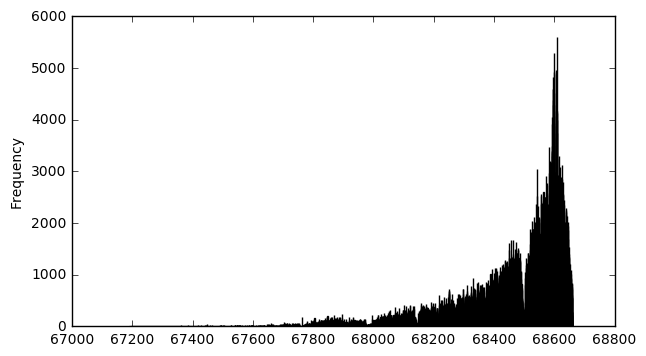

In [30]:
fig,ax = plt.subplots(figsize = (5,3))
browse_unique_time["bh_time"].plot(kind = "hist",bins = 10000,ax = ax)
plt.show()

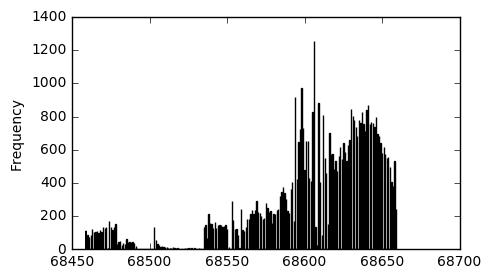

In [33]:
loan_time_86400 = loan_time_train[["grant_time"]]/86400
fig,ax = plt.subplots(figsize = (5,3))
loan_time_86400["grant_time"].plot(kind = "hist",bins = 1000,ax = ax)
plt.show()


In [ ]:
pd.browse_unique_250ab
gb_bh = browse_unique_250ab.groupby("user_id")
gb_bh["bh_time"].